In [1]:
import pandas as pd

In [28]:
data=pd.read_csv(r"E:\DS Projects\Project\dataset.csv",
                  sep=",", encoding='cp1252')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Response Id                                                                                                           59999 non-null  int64 
 1   You regularly make new friends.                                                                                       59999 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 4   You often 

In [4]:
# Display the first few rows of the dataset
print(data.head())


   Response Id  You regularly make new friends.  \
0            0                                0   
1            1                                0   
2            2                                0   
3            3                                0   
4            4                                0   

   You spend a lot of your free time exploring various random topics that pique your interest  \
0                                                  0                                            
1                                                  0                                            
2                                                  0                                            
3                                                 -1                                            
4                                                  0                                            

   Seeing other people cry can easily make you feel like you want to cry too  \
0                             

In [5]:
# Summary statistics for numeric columns
print(data.describe())

        Response Id  You regularly make new friends.  \
count  59999.000000                     59999.000000   
mean   29999.000000                        -0.000867   
std    17320.363738                         0.365701   
min        0.000000                        -2.000000   
25%    14999.500000                         0.000000   
50%    29999.000000                         0.000000   
75%    44998.500000                         0.000000   
max    59998.000000                         1.000000   

       You spend a lot of your free time exploring various random topics that pique your interest  \
count                                       59999.000000                                            
mean                                           -0.000467                                            
std                                             0.364652                                            
min                                            -1.000000                                   

In [6]:
# Check for missing values
print(data.isnull().sum())

Response Id                                                                                   0
You regularly make new friends.                                                               0
You spend a lot of your free time exploring various random topics that pique your interest    0
Seeing other people cry can easily make you feel like you want to cry too                     0
You often make a backup plan for a backup plan.                                               0
                                                                                             ..
You are very intrigued by things labeled as controversial.                                    0
You would pass along a good opportunity if you thought someone else needed it more.           0
You struggle with deadlines.                                                                  0
You feel confident that things will work out for you.                                         0
Personality                             

In [4]:
data.columns

Index(['Response Id', 'You regularly make new friends.',
       'You spend a lot of your free time exploring various random topics that pique your interest',
       'Seeing other people cry can easily make you feel like you want to cry too',
       'You often make a backup plan for a backup plan.',
       'You usually stay calm, even under a lot of pressure',
       'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
       'You prefer to completely finish one project before starting another.',
       'You are very sentimental.',
       'You like to use organizing tools like schedules and lists.',
       'Even a small mistake can cause you to doubt your overall abilities and knowledge.',
       'You feel comfortable just walking up to someone you find interesting and striking up a conversation.',
       'You are not too interested in discussing various interpretations and analyses of creative works.',
       'You are more

In [7]:
# Data distribution for 'Personality' column (Categorical)
print(data['Personality'].value_counts())

ESFP    3769
INFJ    3761
ENFP    3760
ENTP    3760
ESTJ    3759
ISTJ    3756
ISTP    3755
ESTP    3749
ISFP    3746
ESFJ    3746
ENFJ    3743
INTJ    3743
INTP    3742
ISFJ    3739
ENTJ    3737
INFP    3734
Name: Personality, dtype: int64


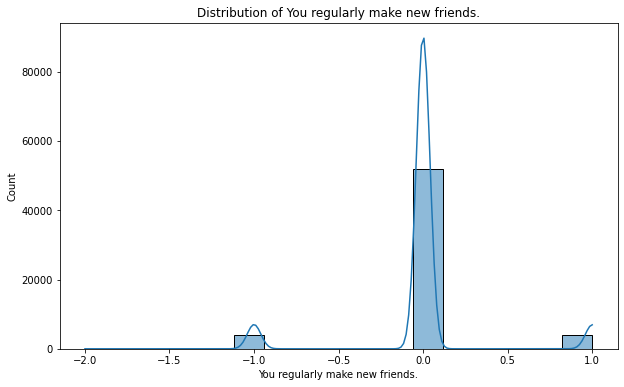

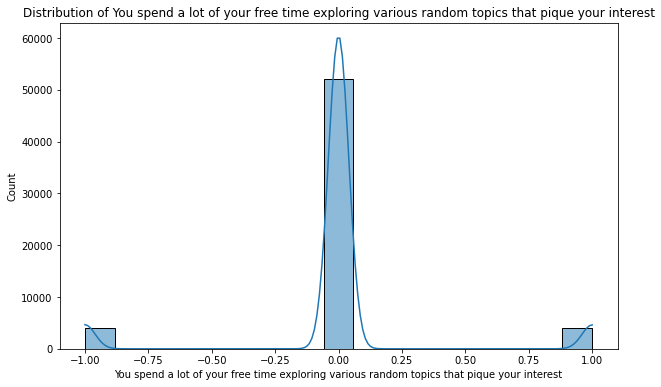

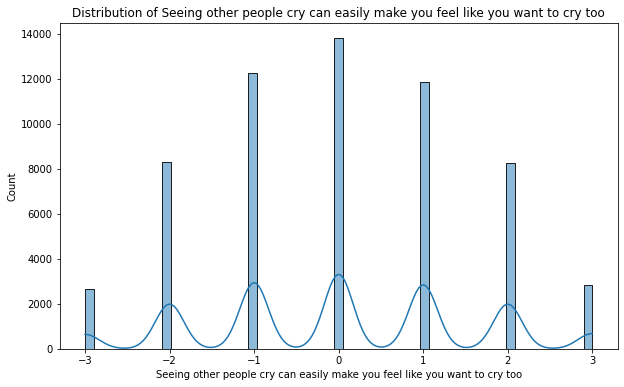

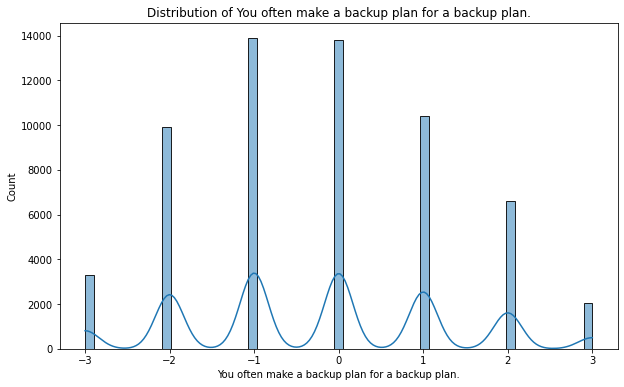

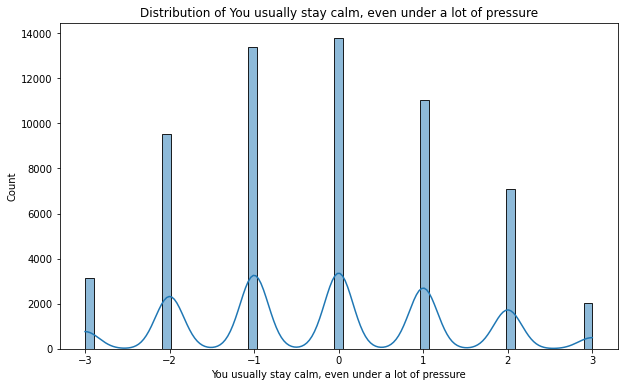

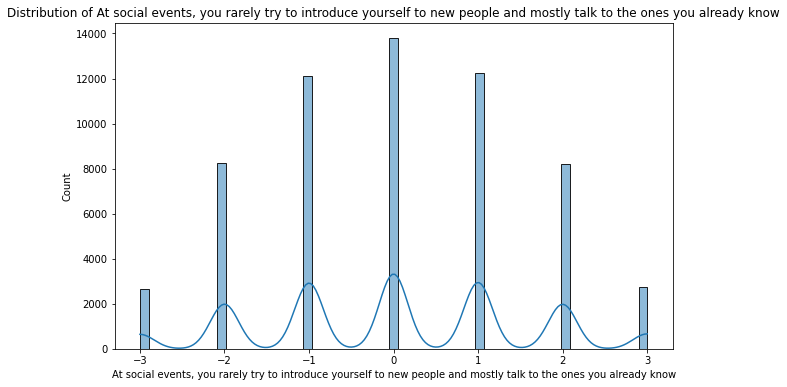

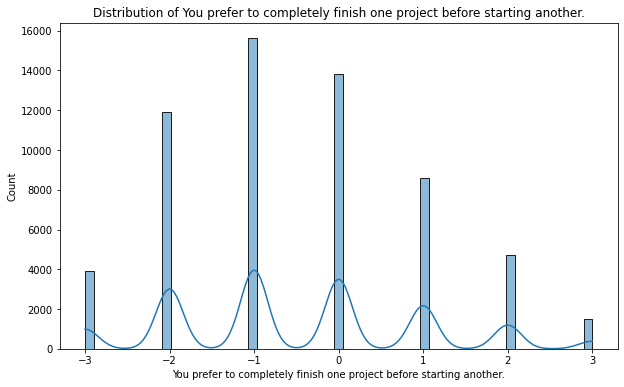

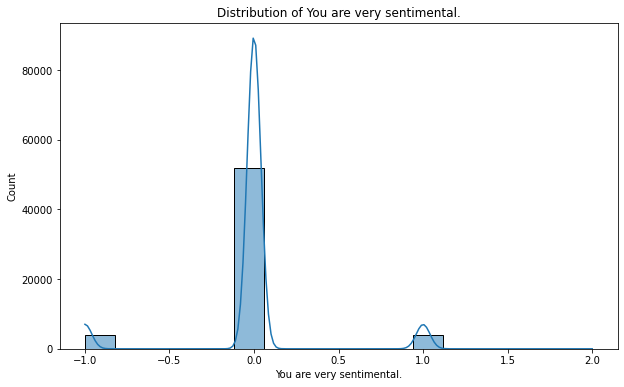

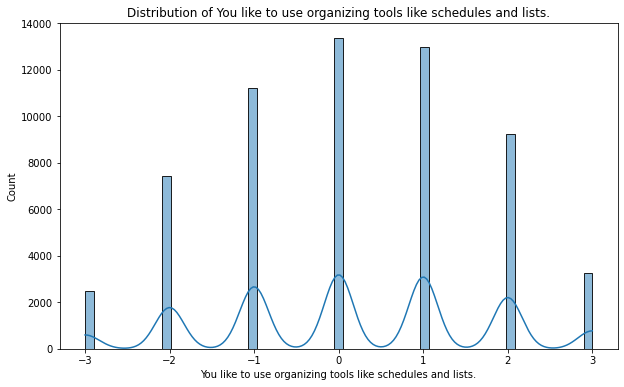

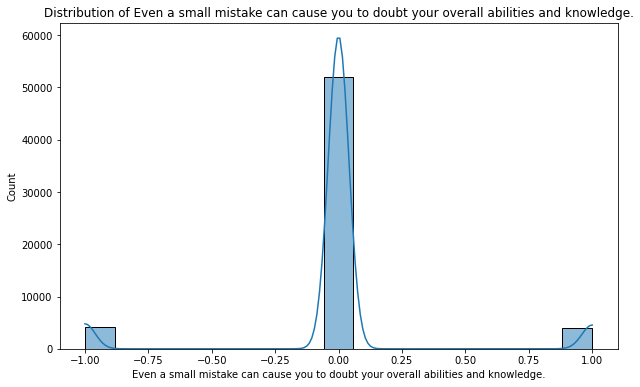

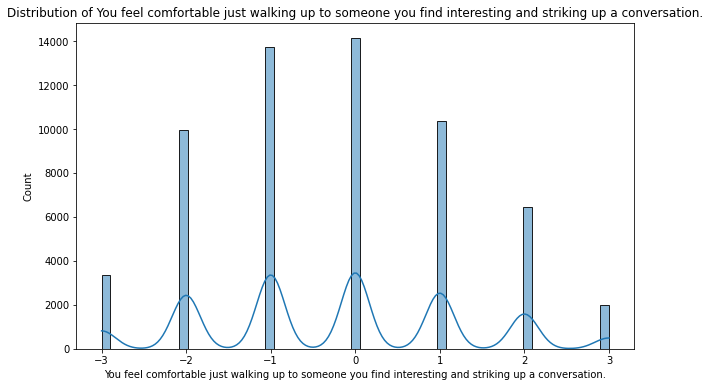

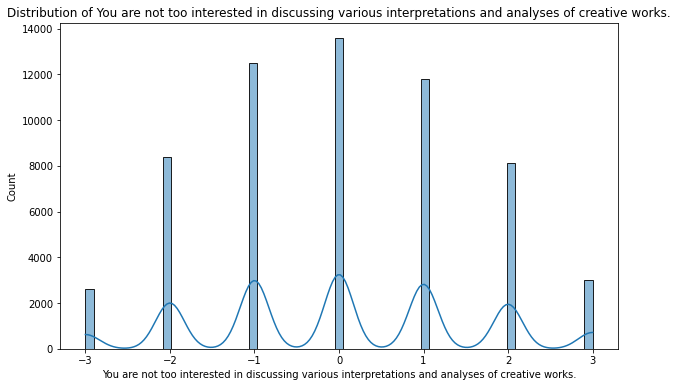

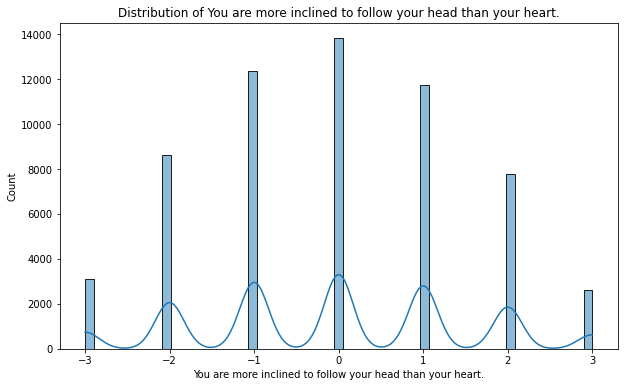

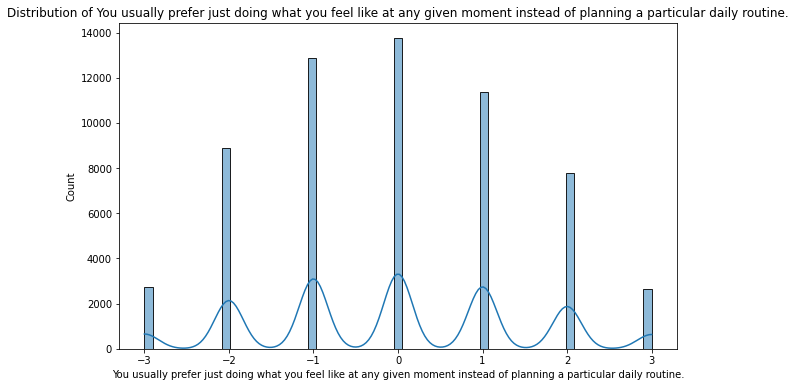

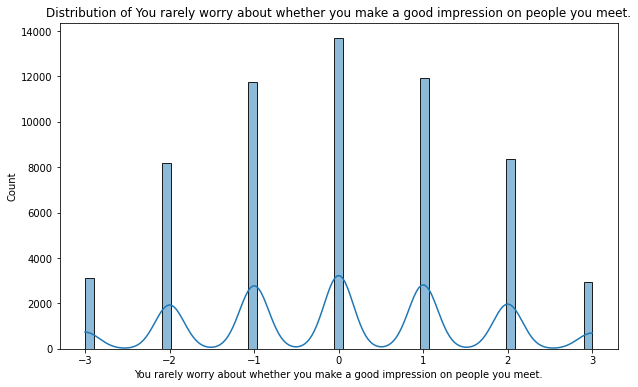

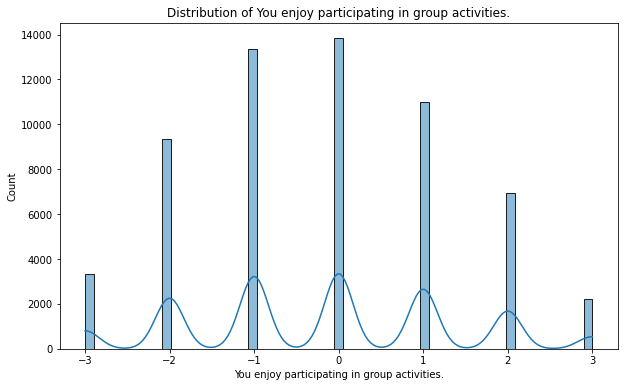

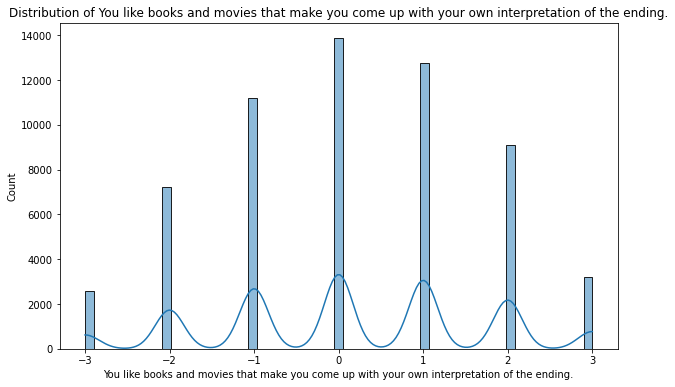

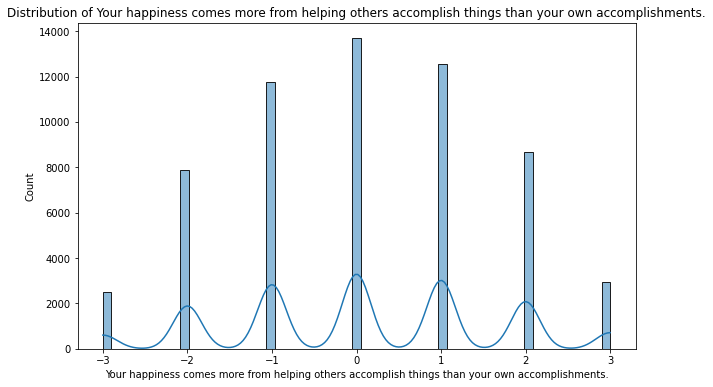

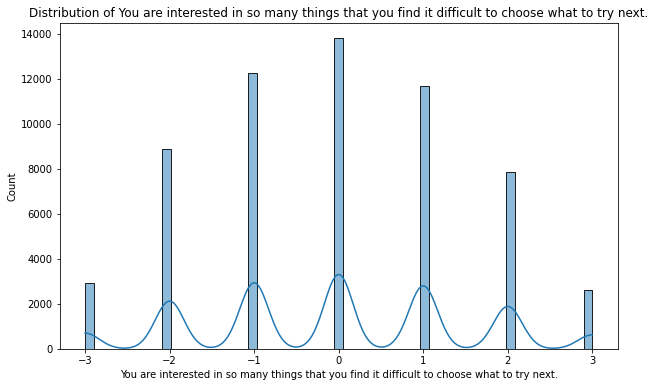

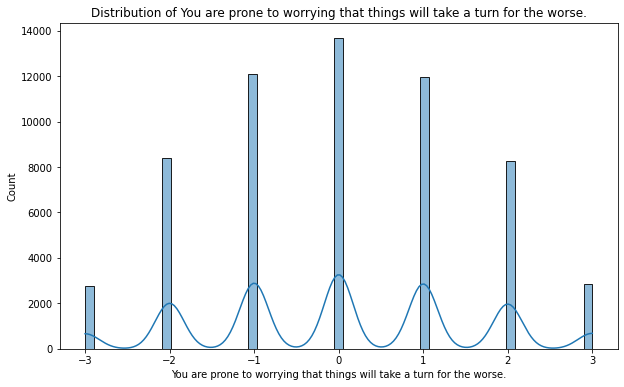

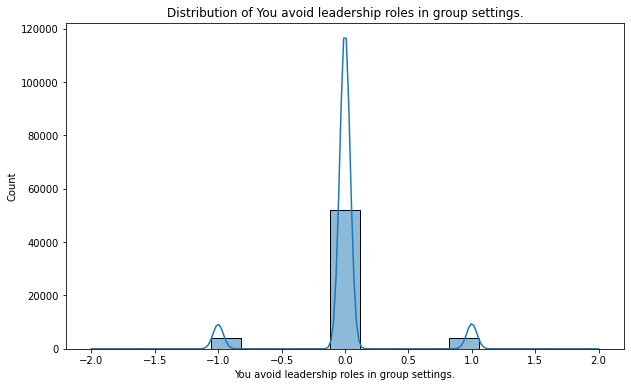

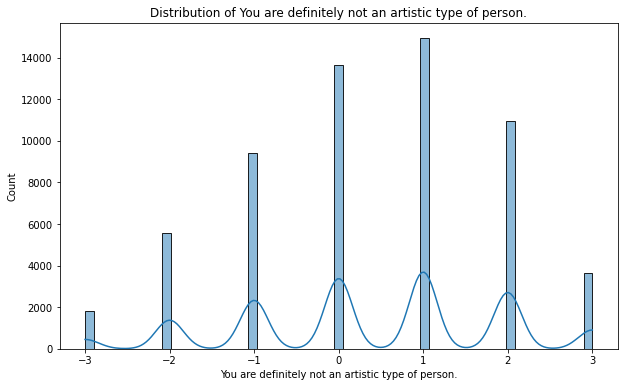

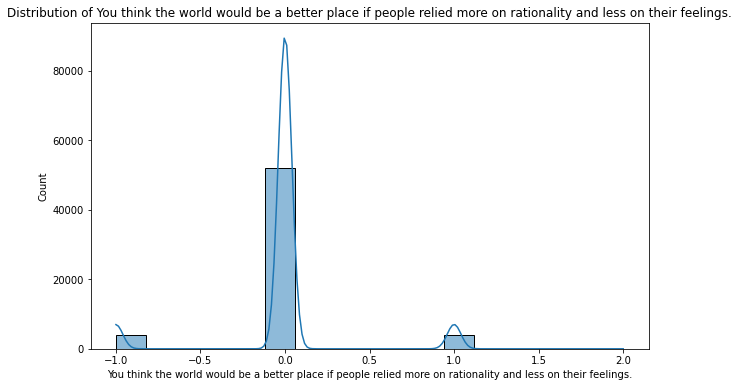

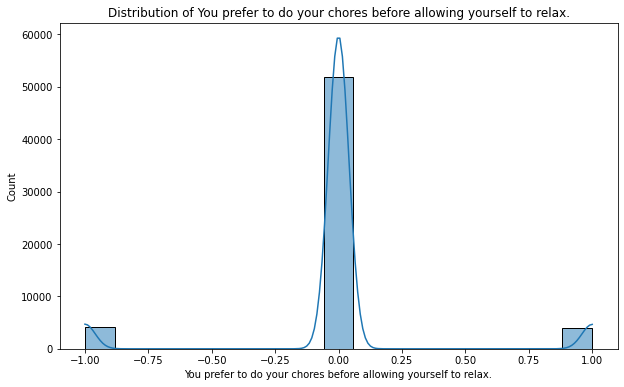

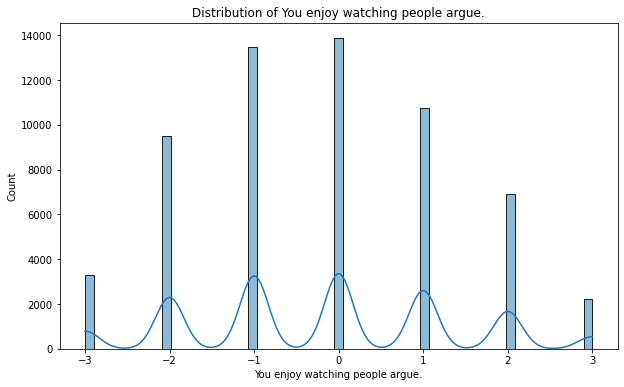

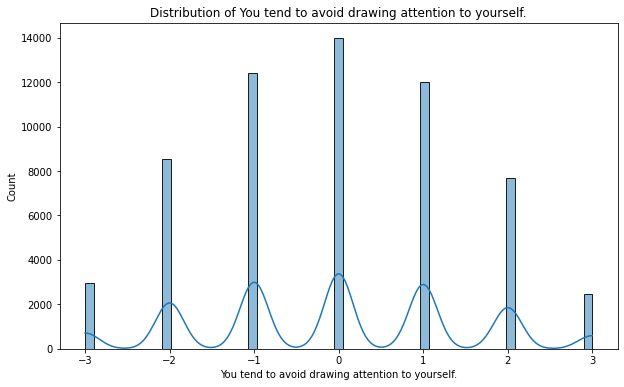

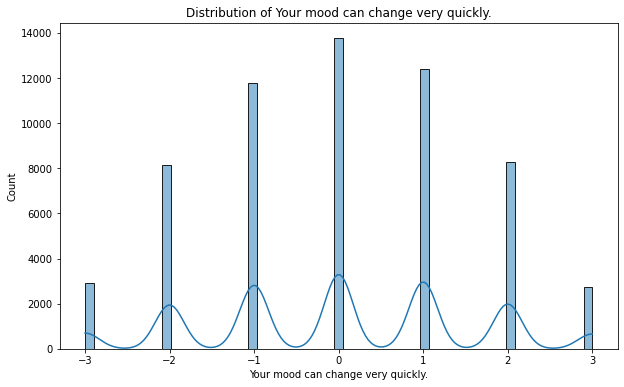

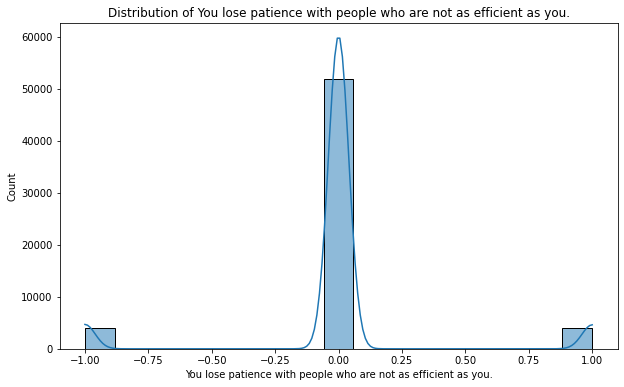

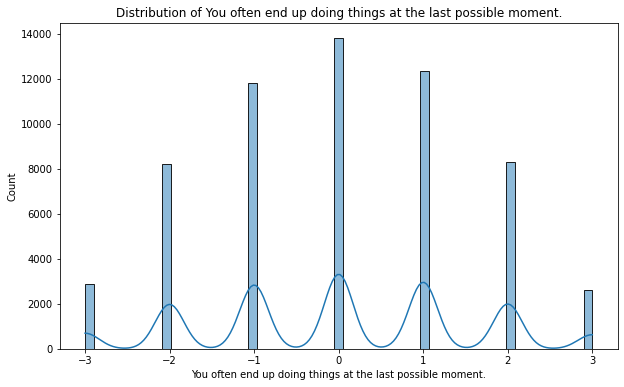

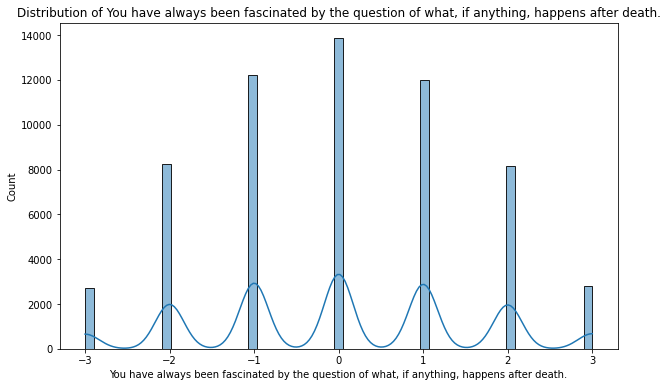

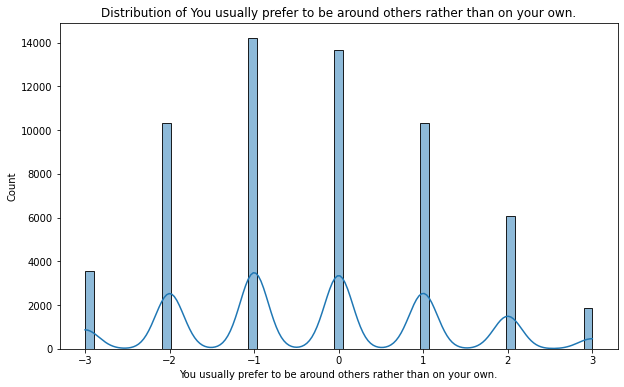

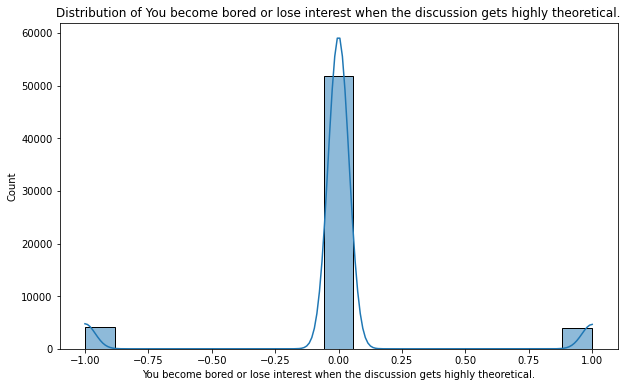

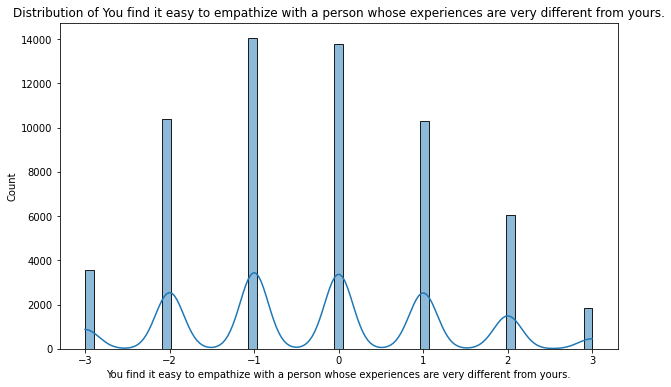

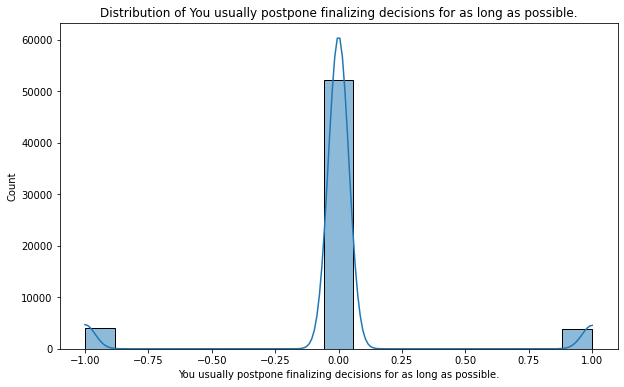

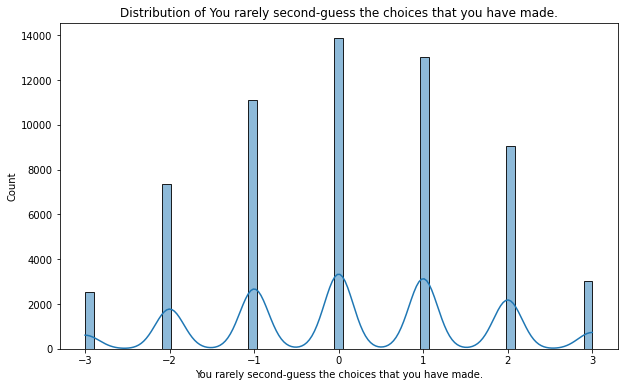

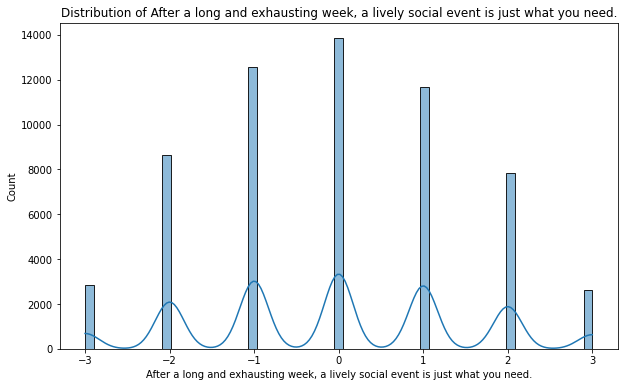

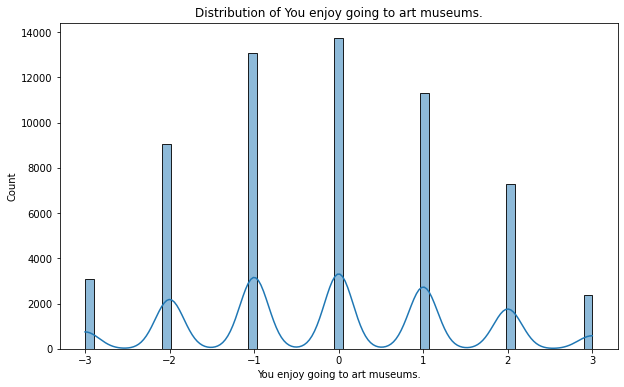

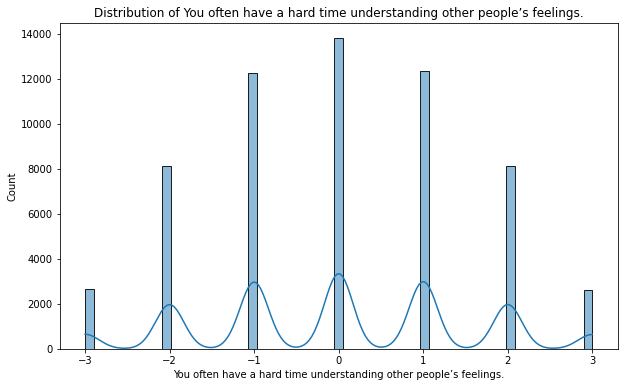

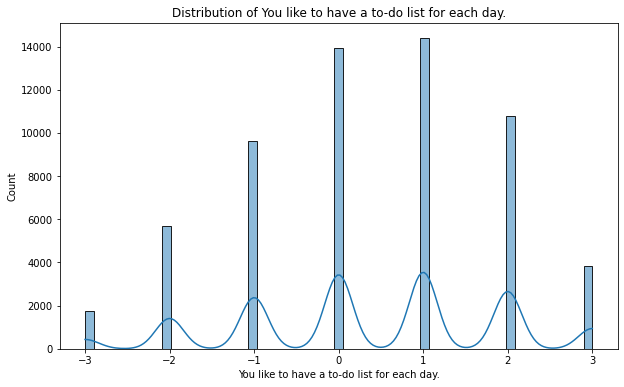

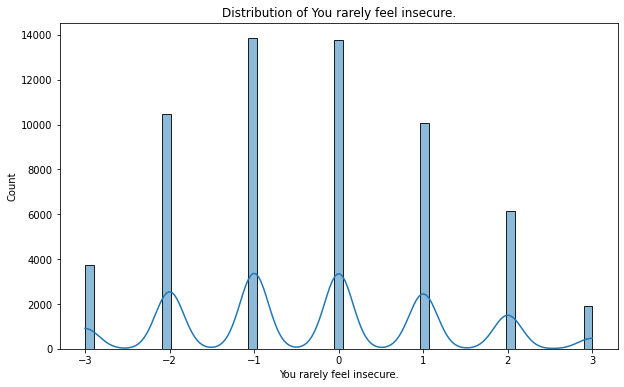

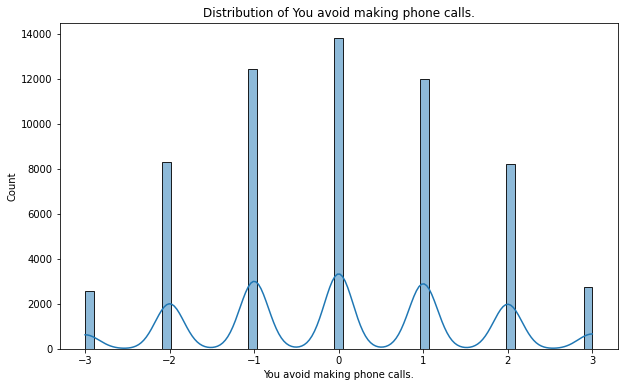

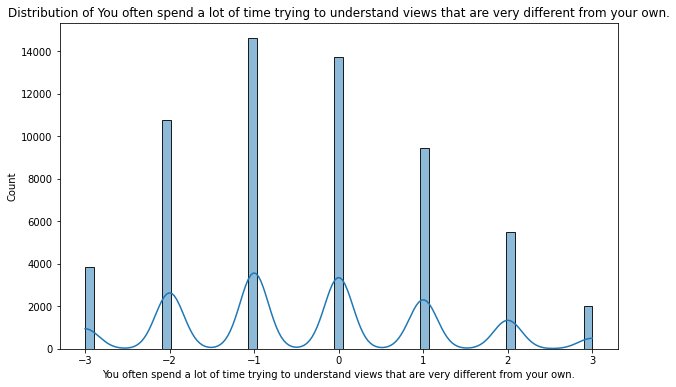

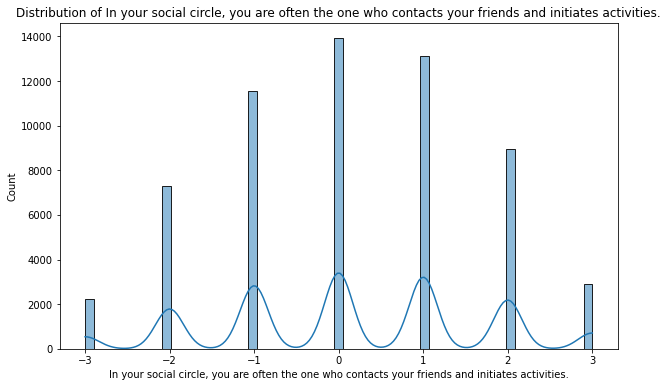

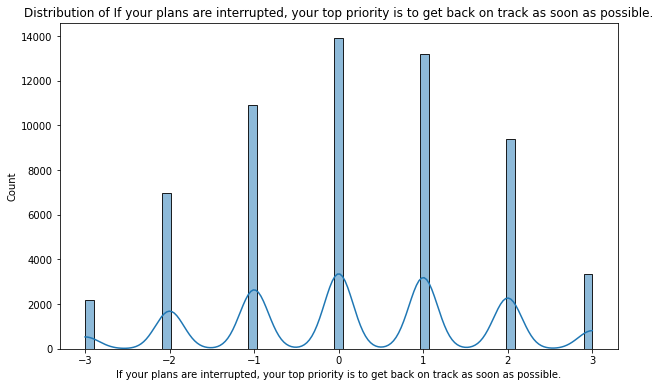

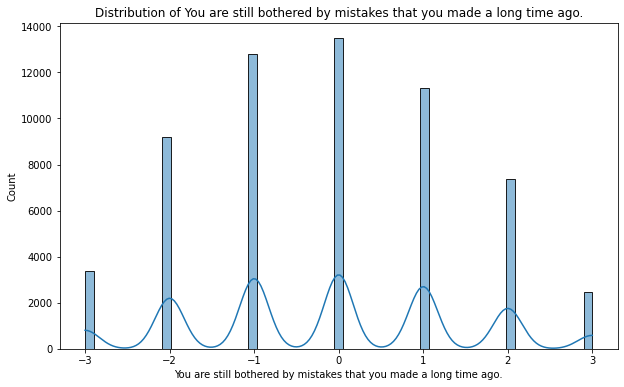

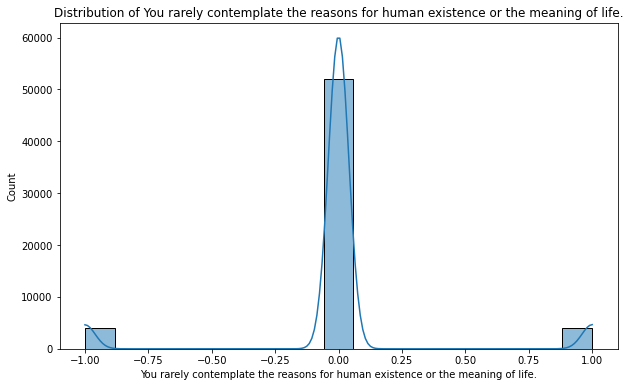

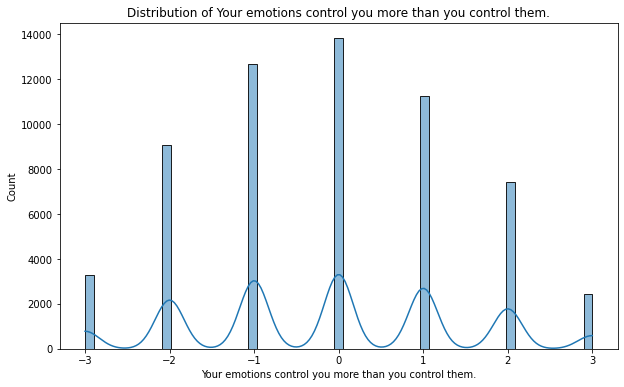

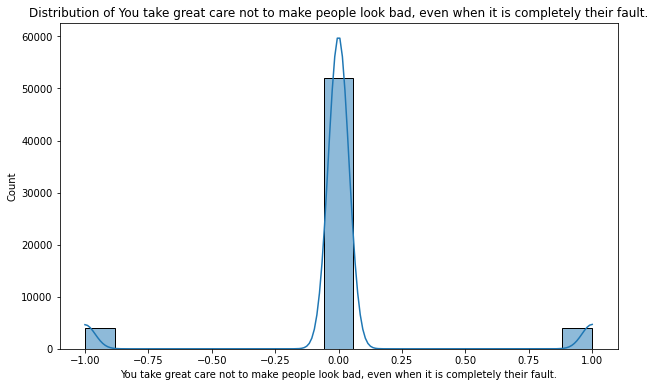

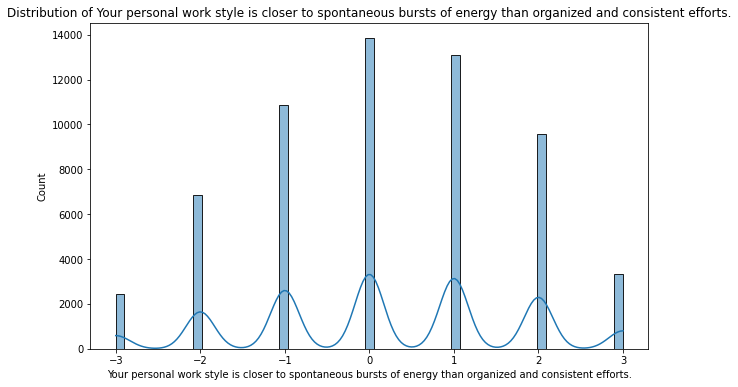

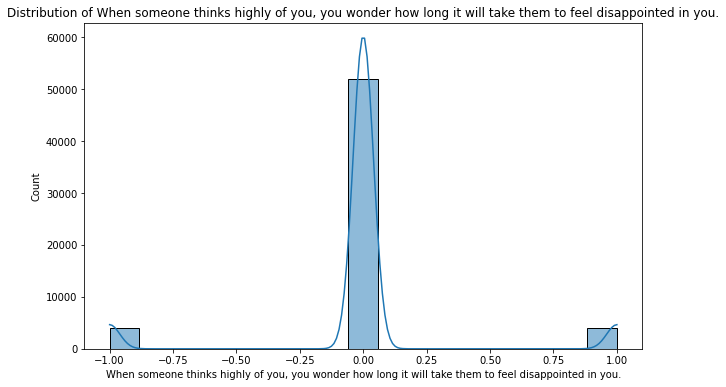

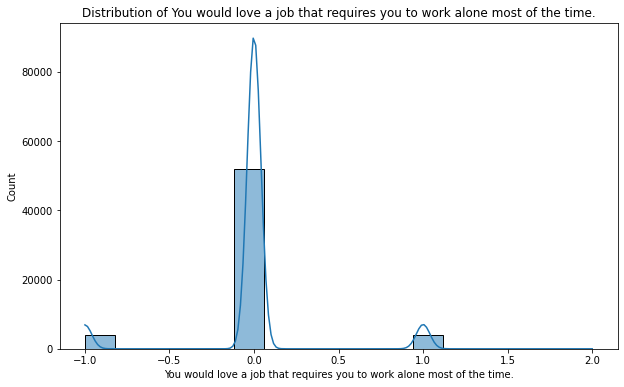

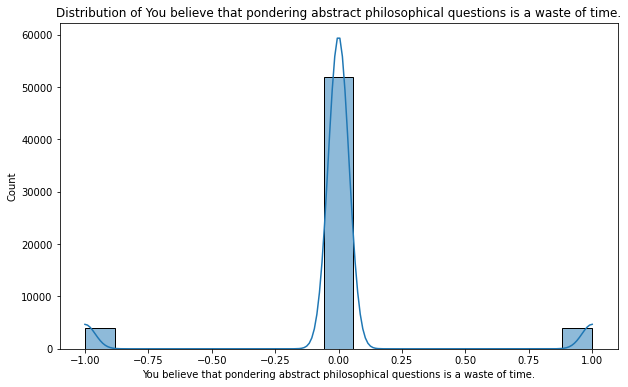

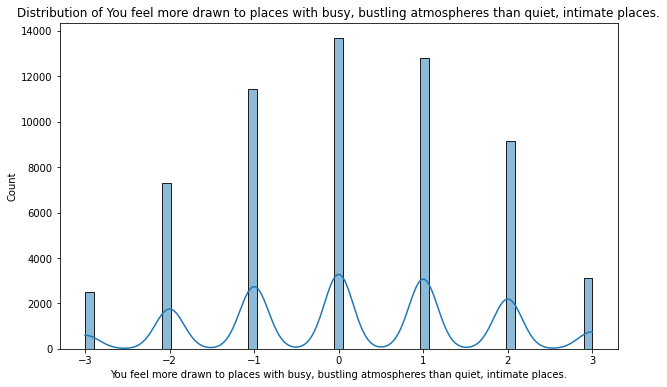

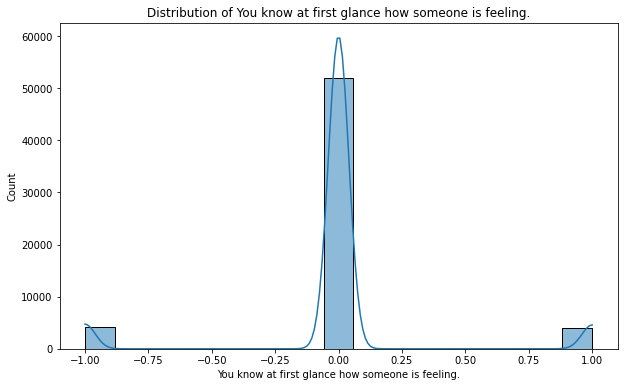

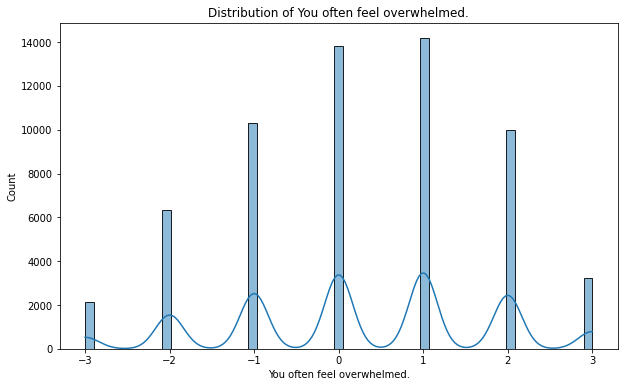

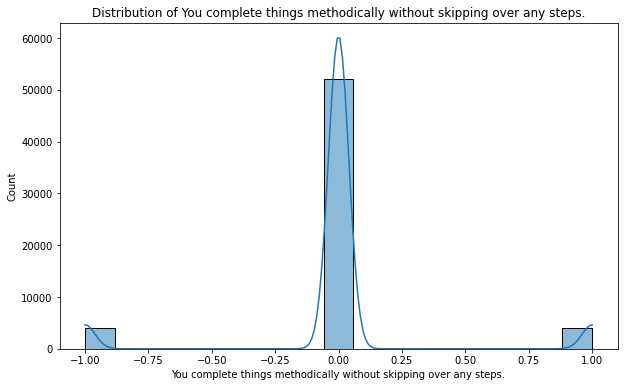

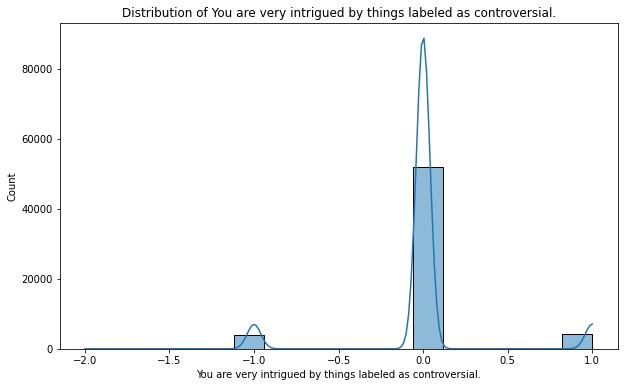

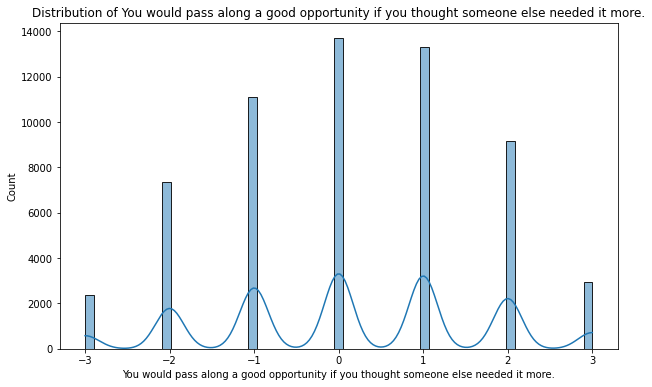

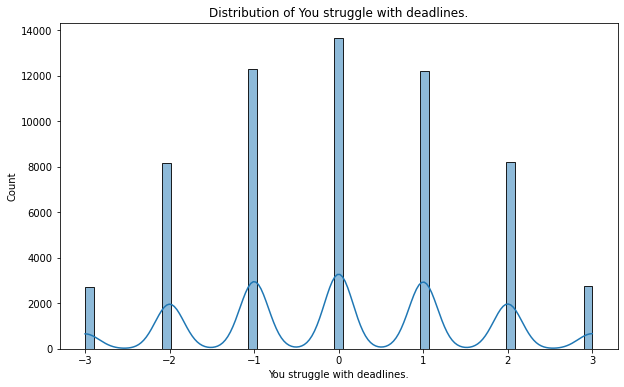

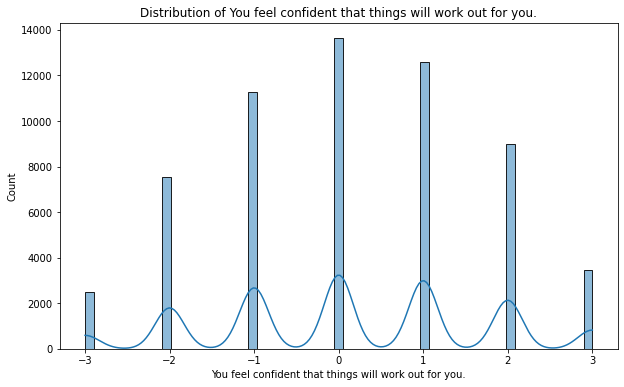

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Data distribution for all other numeric columns
for column in data.columns[1:-1]:  # Exclude 'Response Id' and 'Personality' columns
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

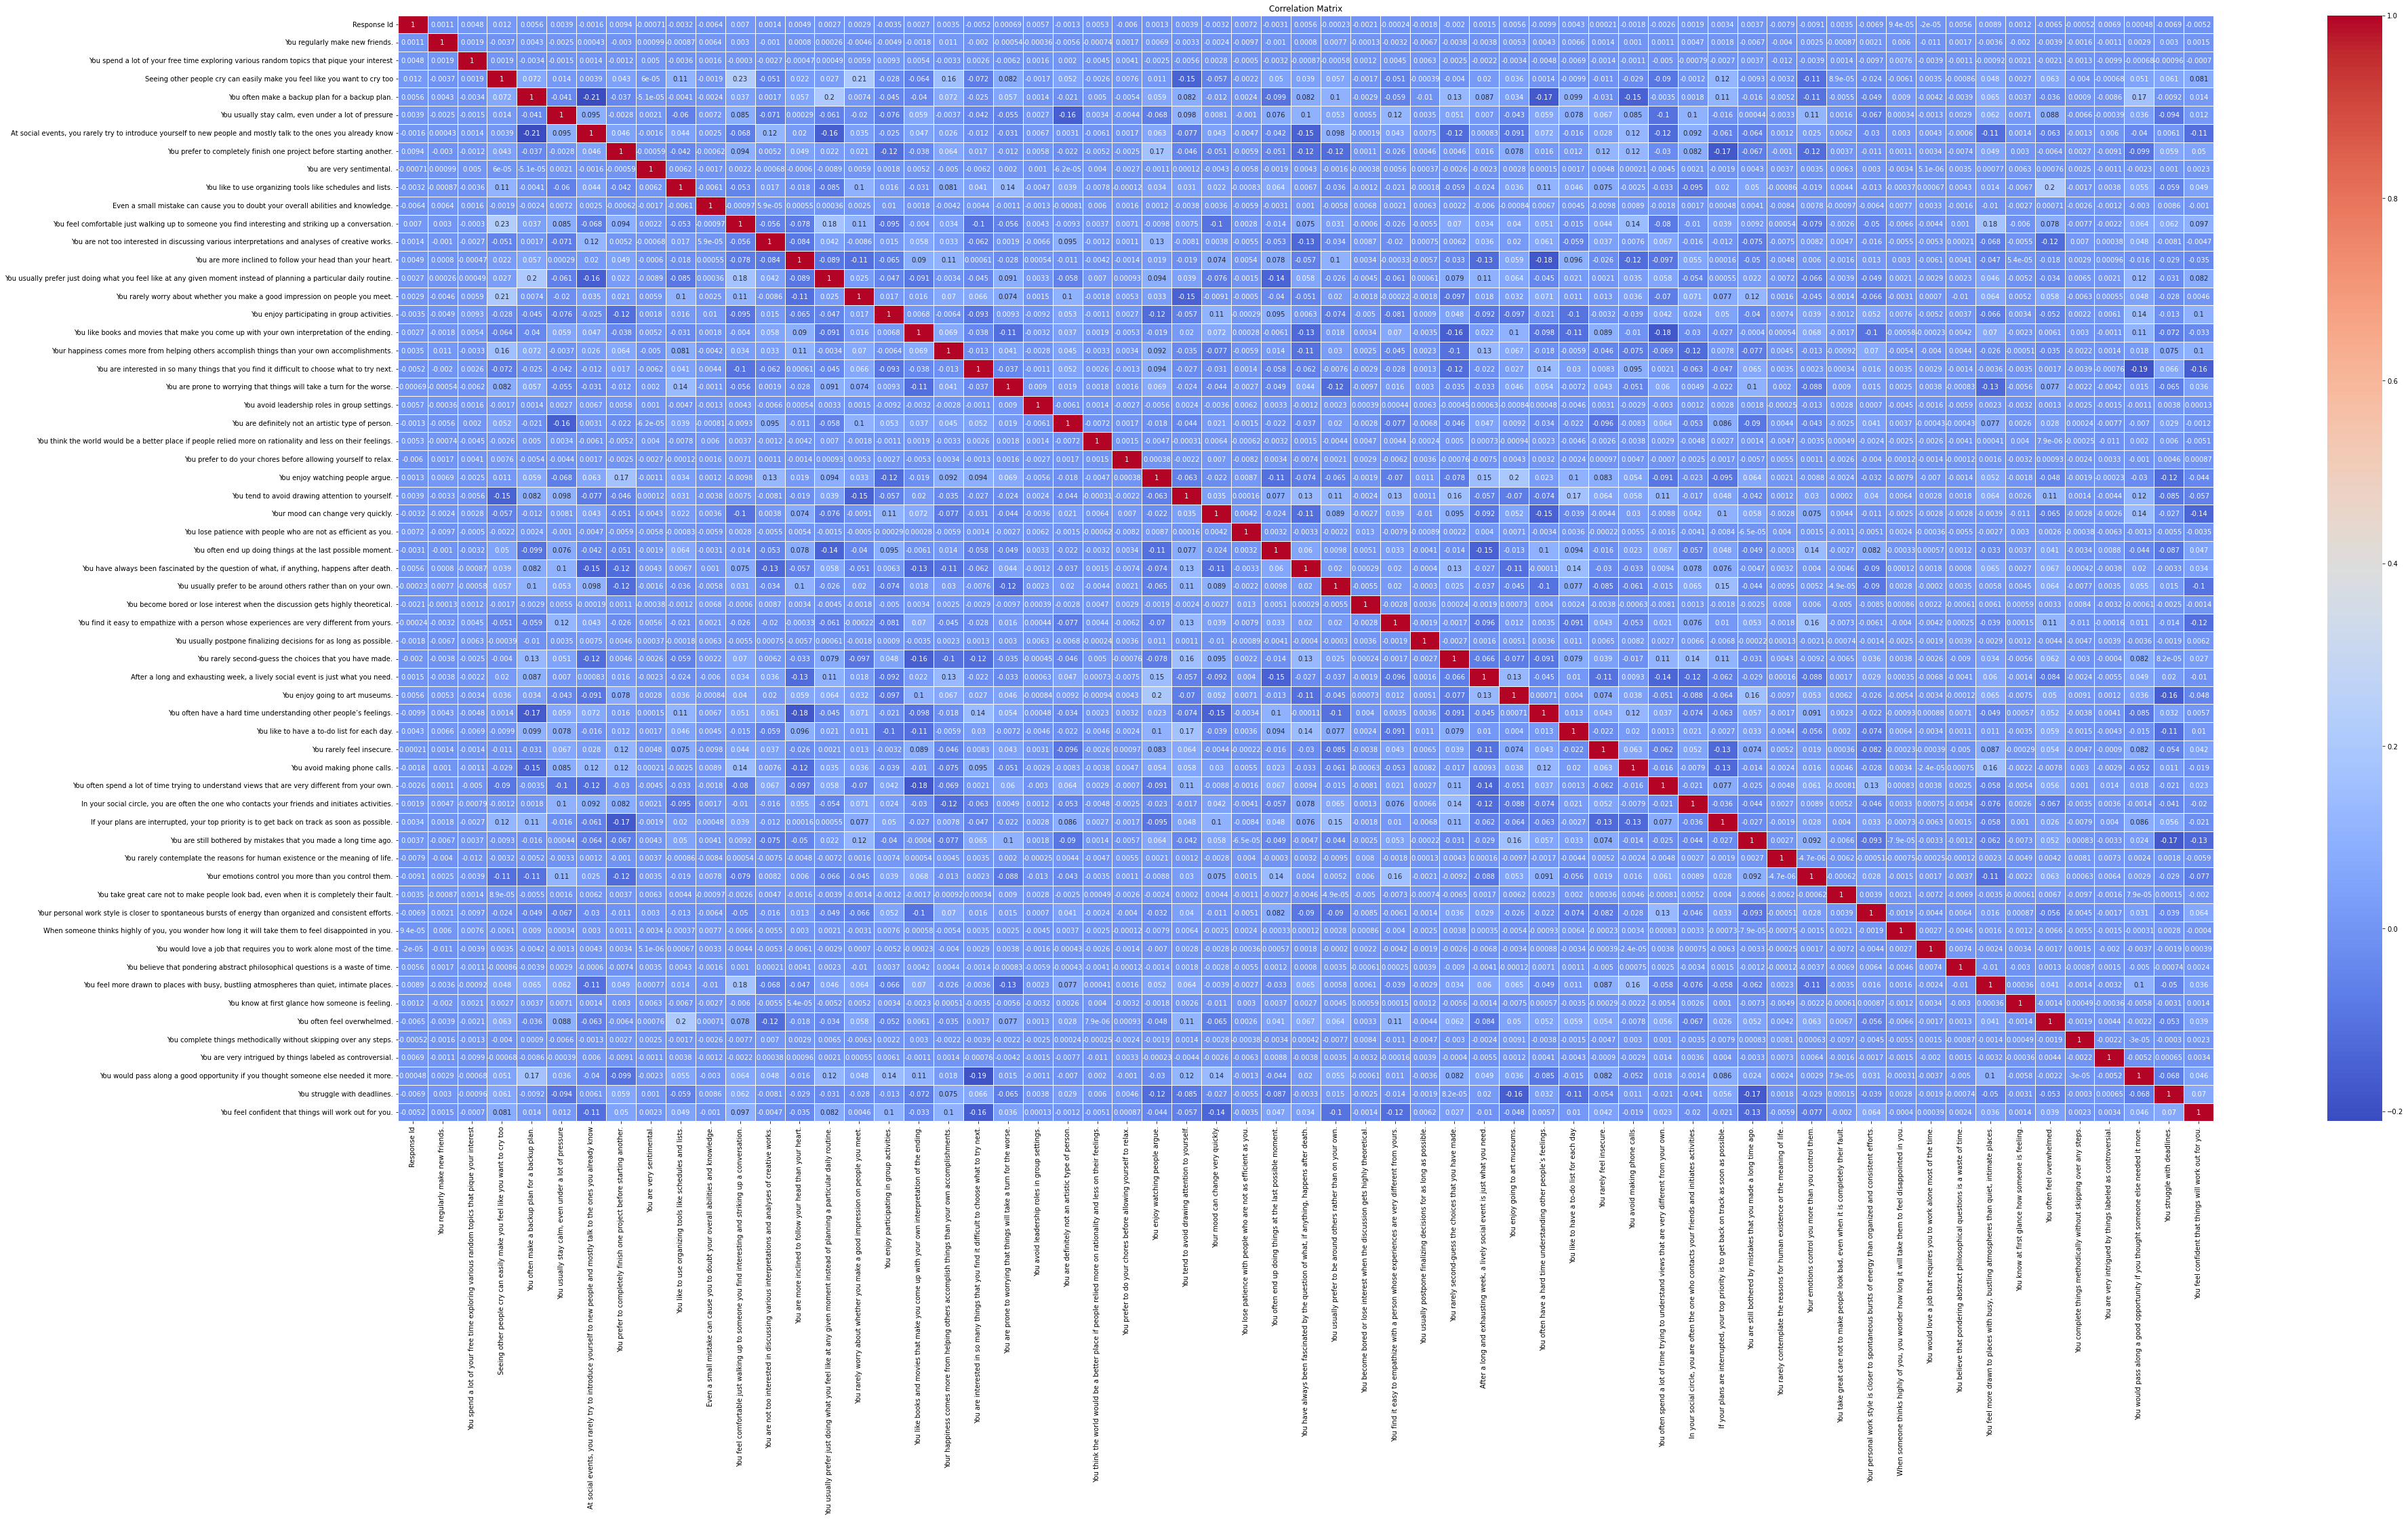

In [18]:
# Correlation matrix for numeric columns
plt.figure(figsize=(60, 30))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

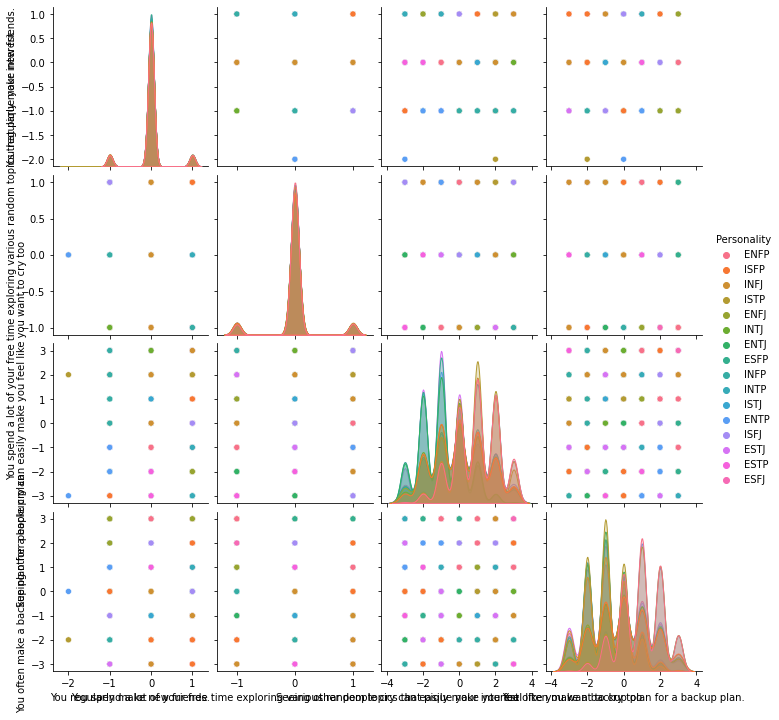

In [13]:
sns.pairplot(data=data, vars=['You regularly make new friends.', 'You spend a lot of your free time exploring various random topics that pique your interest', 'Seeing other people cry can easily make you feel like you want to cry too', 'You often make a backup plan for a backup plan.'], hue='Personality')
plt.show()

In [23]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=524)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')
scores=metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", scores*100)

Accuracy:  97.49166666666666


In [24]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[766   2   0   0   2   0   0   1   3   1   2   1   0   0   0   2]
 [  1 724   0   1   2   0   4   1   0   1   1   1   1   0   0   2]
 [  0   0 723   3   4   1   3   3   1   0   0   0   2   1   2   2]
 [  3   4   0 721   0   0   2   0   2   1   0   1   1   1   0   0]
 [  1   1   0   2 722   4   1   6   2   4   5   1   0   1   2   2]
 [  1   0   1   0   1 714   4   1   1   1   2   2   1   0   0   1]
 [  1   0   1   1   1   0 702   1   1   4   0   1   2   1   0   0]
 [  0   2   3   1   1   2   0 766   0   0   4   1   1   1   0   0]
 [  1   0   1   4   1   1   0   2 711   1   1   3   0   2   2   1]
 [  2   0   1   0   2   0   4   0   2 776   0   0   0   0   0   2]
 [  2   1   1   2   3   1   1   0   0   1 728   1   1   2   1   2]
 [  2   2   1   0   2   0   1   1   0   2   3 731   1   1   0   2]
 [  2   1   1   0   0   0   4   0   0   4   1   0 767   1   1   3]
 [  0   1   2   4   0   2   0   0   2   4   0   1   0 715   1   4]
 [  2   1   2   2   0   1   1   0   3   2

In [25]:
from sklearn.metrics import classification_report


# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

        ENFJ       0.97      0.98      0.98       780
        ENFP       0.98      0.98      0.98       739
        ENTJ       0.98      0.97      0.97       745
        ENTP       0.97      0.98      0.98       736
        ESFJ       0.97      0.96      0.97       754
        ESFP       0.98      0.98      0.98       730
        ESTJ       0.97      0.98      0.97       716
        ESTP       0.98      0.98      0.98       782
        INFJ       0.98      0.97      0.97       731
        INFP       0.97      0.98      0.97       789
        INTJ       0.97      0.97      0.97       747
        INTP       0.97      0.98      0.98       749
        ISFJ       0.98      0.98      0.98       785
        ISFP       0.98      0.97      0.98       736
        ISTJ       0.99      0.96      0.97       724
        ISTP       0.96      0.98      0.97       757

    accuracy                           0.97     12000
   macro avg       0.98   

In [26]:
from sklearn.feature_selection import RFE


# Assuming you have X_train, X_test, y_train, and y_test defined
clf = RandomForestClassifier(n_estimators=100,random_state=42)

# Specify the number of features to select (you can adjust this)
n_features_to_select = 20

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=clf, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Train your model using the selected features
clf.fit(X_train[selected_features], y_train)
print(selected_features)

# Evaluate the model and generate a classification report
y_pred = clf.predict(X_test[selected_features])
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


Index(['Seeing other people cry can easily make you feel like you want to cry too',
       'You usually stay calm, even under a lot of pressure',
       'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
       'You usually prefer just doing what you feel like at any given moment instead of planning a particular daily routine.',
       'You enjoy participating in group activities.',
       'You like books and movies that make you come up with your own interpretation of the ending.',
       'Your happiness comes more from helping others accomplish things than your own accomplishments.',
       'You are interested in so many things that you find it difficult to choose what to try next.',
       'You are prone to worrying that things will take a turn for the worse.',
       'Your mood can change very quickly.',
       'You often end up doing things at the last possible moment.',
       'You find it easy to empathize with a 

In [30]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

y=data['Personality']
X=data[['Seeing other people cry can easily make you feel like you want to cry too',
       'You usually stay calm, even under a lot of pressure',
       'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
       'You usually prefer just doing what you feel like at any given moment instead of planning a particular daily routine.',
       'You enjoy participating in group activities.',
       'You like books and movies that make you come up with your own interpretation of the ending.',
       'Your happiness comes more from helping others accomplish things than your own accomplishments.',
       'You are interested in so many things that you find it difficult to choose what to try next.',
       'You are prone to worrying that things will take a turn for the worse.',
       'Your mood can change very quickly.',
       'You often end up doing things at the last possible moment.',
       'You find it easy to empathize with a person whose experiences are very different from yours.',
       'You rarely second-guess the choices that you have made.',
       'After a long and exhausting week, a lively social event is just what you need.',
       'You enjoy going to art museums.',
       'You often have a hard time understanding other people’s feelings.',
       'You avoid making phone calls.',
       'You are still bothered by mistakes that you made a long time ago.',
       'You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.',
       'You struggle with deadlines.']]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=524)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')
scores=metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", scores*100)

Accuracy:  86.825


In [32]:
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[713   1   1   0   6   8   2   4   6   8   9   4  10   3   3   2]
 [  3 665   1   6  14   1   5  10   3   4   7   3   7   3   1   6]
 [  2   5 671   3   4   4   8  13   2   2   5   0   6   4  11   5]
 [  5   9   6 661   1   3   5   6   9   5   5   5   5   7   3   1]
 [  2  15   4   1 654  10   8  12   7  10   6   4   4   3  11   3]
 [  5   8   3   2   9 639  13   6   6   1   6  15   1   3   4   9]
 [  1   7   7   1   4   6 622   7   2  15   8  11   5   9   9   2]
 [  9  18   7  13   7   3   9 683   2   4   8  10   2   2   0   5]
 [  2   5   4   6   4   7   3   6 638   8  10   6   2  13  12   5]
 [ 12   7  16  12   2   3  23  11   9 656   6   4   9  10   5   4]
 [  6  11   3   7   6  15   5   6   5   5 630  16  17   3   4   8]
 [  2   5  10  26   3  14   8   7   6   2   8 634   5   2  11   6]
 [ 13   1   4   6   6   3   6   1   3  12   6   5 688   5  11  15]
 [  5   8   8   7   1   6   7   4  11   7   6   5   2 635   5  19]
 [  7   9  30   6   5   3   3   9   5   6

In [31]:
# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

        ENFJ       0.90      0.91      0.91       780
        ENFP       0.86      0.90      0.88       739
        ENTJ       0.86      0.90      0.88       745
        ENTP       0.87      0.90      0.88       736
        ESFJ       0.88      0.87      0.88       754
        ESFP       0.87      0.88      0.87       730
        ESTJ       0.85      0.87      0.86       716
        ESTP       0.87      0.87      0.87       782
        INFJ       0.89      0.87      0.88       731
        INFP       0.87      0.83      0.85       789
        INTJ       0.86      0.84      0.85       747
        INTP       0.85      0.85      0.85       749
        ISFJ       0.88      0.88      0.88       785
        ISFP       0.87      0.86      0.87       736
        ISTJ       0.85      0.80      0.82       724
        ISTP       0.86      0.86      0.86       757

    accuracy                           0.87     12000
   macro avg       0.87   

In [20]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Define the features and target variable
y = data['Personality']
X = data.drop(columns=['Response Id', 'Personality'])  # Exclude ID and target column


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier (you can replace this with your actual model)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Calculate the accuracy on the test set
initial_accuracy = clf.score(X_test, y_test)

# Evaluate feature importance
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)

# Sort feature importance in descending order
sorted_features = feature_importance.sort_values(ascending=False)

# Initialize a list to store columns with minimal impact
columns_to_remove = []

# Iterate through the sorted features and evaluate accuracy after removing each feature
for feature in sorted_features.index:
    # Create a copy of the data with the feature removed
    reduced_X_train = X_train.drop(columns=[feature])
    reduced_X_test = X_test.drop(columns=[feature])

    # Train the model with the reduced feature set
    clf.fit(reduced_X_train, y_train)

    # Calculate accuracy with the reduced feature set
    reduced_accuracy = clf.score(reduced_X_test, y_test)

    # If the accuracy drops by less than a threshold, consider removing the feature
    if initial_accuracy - reduced_accuracy < 0.01:  # Adjust the threshold as needed
        columns_to_remove.append(feature)

# Print the columns to remove
print("Columns to remove:", columns_to_remove)


Columns to remove: ['You are prone to worrying that things will take a turn for the worse.', 'You often end up doing things at the last possible moment.', 'You enjoy going to art museums.', 'Your happiness comes more from helping others accomplish things than your own accomplishments.', 'You find it easy to empathize with a person whose experiences are very different from yours.', 'Your mood can change very quickly.', 'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know', 'You are not too interested in discussing various interpretations and analyses of creative works.', 'You like to have a to-do list for each day.', 'You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.', 'You often feel overwhelmed.', 'You usually prefer just doing what you feel like at any given moment instead of planning a particular daily routine.', 'You are more inclined to follow your head than your heart.', 'You ra

In [21]:
data.drop(columns=['You are prone to worrying that things will take a turn for the worse.', 'You often end up doing things at the last possible moment.', 'You enjoy going to art museums.', 'Your happiness comes more from helping others accomplish things than your own accomplishments.', 'You find it easy to empathize with a person whose experiences are very different from yours.', 'Your mood can change very quickly.', 'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know', 'You are not too interested in discussing various interpretations and analyses of creative works.', 'You like to have a to-do list for each day.', 'You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.', 'You often feel overwhelmed.', 'You usually prefer just doing what you feel like at any given moment instead of planning a particular daily routine.', 'You are more inclined to follow your head than your heart.', 'You rarely worry about whether you make a good impression on people you meet.', 'You have always been fascinated by the question of what, if anything, happens after death.', 'You enjoy participating in group activities.', 'You struggle with deadlines.', 'Seeing other people cry can easily make you feel like you want to cry too', 'You often make a backup plan for a backup plan.', 'You avoid making phone calls.', 'You often have a hard time understanding other people’s feelings.', 'You like books and movies that make you come up with your own interpretation of the ending.', 'After a long and exhausting week, a lively social event is just what you need.', 'You would pass along a good opportunity if you thought someone else needed it more.', 'You are still bothered by mistakes that you made a long time ago.', 'You usually stay calm, even under a lot of pressure', 'In your social circle, you are often the one who contacts your friends and initiates activities.', 'You are definitely not an artistic type of person.', 'You are interested in so many things that you find it difficult to choose what to try next.', 'You rarely second-guess the choices that you have made.', 'You feel comfortable just walking up to someone you find interesting and striking up a conversation.', 'You like to use organizing tools like schedules and lists.', 'You enjoy watching people argue.', 'You tend to avoid drawing attention to yourself.', 'Your emotions control you more than you control them.', 'You feel confident that things will work out for you.', 'You usually prefer to be around others rather than on your own.', 'Your personal work style is closer to spontaneous bursts of energy than organized and consistent efforts.', 'You rarely feel insecure.', 'If your plans are interrupted, your top priority is to get back on track as soon as possible.', 'You often spend a lot of time trying to understand views that are very different from your own.', 'You prefer to completely finish one project before starting another.', 'You think the world would be a better place if people relied more on rationality and less on their feelings.', 'Even a small mistake can cause you to doubt your overall abilities and knowledge.', 'You avoid leadership roles in group settings.', 'You lose patience with people who are not as efficient as you.', 'You regularly make new friends.', 'You believe that pondering abstract philosophical questions is a waste of time.', 'You know at first glance how someone is feeling.', 'You are very sentimental.', 'You are very intrigued by things labeled as controversial.', 'When someone thinks highly of you, you wonder how long it will take them to feel disappointed in you.', 'You usually postpone finalizing decisions for as long as possible.', 'You take great care not to make people look bad, even when it is completely their fault.', 'You complete things methodically without skipping over any steps.', 'You prefer to do your chores before allowing yourself to relax.', 'You would love a job that requires you to work alone most of the time.', 'You rarely contemplate the reasons for human existence or the meaning of life.', 'You become bored or lose interest when the discussion gets highly theoretical.', 'You spend a lot of your free time exploring various random topics that pique your interest'],inplace=True)

In [22]:
data.columns

Index(['Response Id', 'Personality'], dtype='object')

In [10]:
X=data[['You regularly make new friends.',
        'You spend a lot of your free time exploring various random topics that pique your interest',
'You often make a backup plan for a backup plan.',
'You usually stay calm, even under a lot of pressure',
'You are very sentimental.',
'You like to use organizing tools like schedules and lists.',
'Even a small mistake can cause you to doubt your overall abilities and knowledge.',
'You feel comfortable just walking up to someone you find interesting and striking up a conversation.',
'You enjoy participating in group activities.',
'Your happiness comes more from helping others accomplish things than your own accomplishments.',
'You are interested in so many things that you find it difficult to choose what to try next.',
'You avoid leadership roles in group settings.',
'You find it easy to empathize with a person whose experiences are very different from yours.',
'You often have a hard time understanding other people’s feelings.',
'Your emotions control you more than you control them.']]


In [18]:
X.columns

Index(['You regularly make new friends.',
       'You spend a lot of your free time exploring various random topics that pique your interest',
       'You often make a backup plan for a backup plan.',
       'You usually stay calm, even under a lot of pressure',
       'You are very sentimental.',
       'You like to use organizing tools like schedules and lists.',
       'Even a small mistake can cause you to doubt your overall abilities and knowledge.',
       'You feel comfortable just walking up to someone you find interesting and striking up a conversation.',
       'You enjoy participating in group activities.',
       'Your happiness comes more from helping others accomplish things than your own accomplishments.',
       'You are interested in so many things that you find it difficult to choose what to try next.',
       'You avoid leadership roles in group settings.',
       'You find it easy to empathize with a person whose experiences are very different from yours.',
       '

In [17]:
data.drop(columns='Response Id',inplace=True)

In [16]:
data.columns

Index(['Response Id', 'You regularly make new friends.',
       'You spend a lot of your free time exploring various random topics that pique your interest',
       'Seeing other people cry can easily make you feel like you want to cry too',
       'You often make a backup plan for a backup plan.',
       'You usually stay calm, even under a lot of pressure',
       'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
       'You prefer to completely finish one project before starting another.',
       'You are very sentimental.',
       'You like to use organizing tools like schedules and lists.',
       'Even a small mistake can cause you to doubt your overall abilities and knowledge.',
       'You feel comfortable just walking up to someone you find interesting and striking up a conversation.',
       'You are not too interested in discussing various interpretations and analyses of creative works.',
       'You are more

In [19]:
y=data['Personality']


In [12]:
from sklearn.model_selection import train_test_splitain_test_split 

ImportError: cannot import name 'train_test_splitain_test_split' from 'sklearn.model_selection' (C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=524)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn= KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)

scores=metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", scores*100)

In [ ]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=524)
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

scores=metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", scores*100)

Accuracy:  64.225


In [28]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=524)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')
scores=metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", scores*100)

Accuracy:  57.425000000000004


In [29]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[475  33  40  39  35  10  14  38   5  13  31   8  16   7   7   9]
 [ 12 464  11  43  19  11  13  10   9   9  14  33  28  30  23  10]
 [ 25  12 475   8  24   4  18  46   9  37   5   9  22  14  13  24]
 [ 26  40   6 448   7  31  23   4   5  12  10  11  43  51   9  10]
 [ 43   8  32  14 462  14  18  23  30  18  23  22  12  11  10  14]
 [  8  15   4  18  12 429  30  22  41  16  23  27   7  15  17  46]
 [  9  22  17  23  21  15 419  14  13  23  11  44  17   8   8  52]
 [ 26   4  42   5  26  31  11 521  11  23  18  18   8   6  14  18]
 [  3   7  11   6  15  59  17  19 437  19  28  21  18  14  49   8]
 [ 14  11  78  12  22  20  41  45  45 346  11  49  22  30  39   4]
 [ 38  20  12  24  23  24  34  19  30  11 408  17  26  39  15   7]
 [ 13  28   8  35  31  19  32  19  29  50  20 436   5   8  11   5]
 [ 23  37  25  85  22   6  15  11  18  25  30   2 381  71  12  22]
 [  7  34  30  44  14  15  15   2  21  24  37  18  56 346  39  34]
 [  4  19  19   9  10  32   8  22  31  28

In [36]:
# Import necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier for multiclass classification
logistic_classifier = LogisticRegression(multi_class='multinomial')

# Train the classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')




Accuracy: 0.92
